In [9]:
# import gdown

# file_id = '1HgDuFGd2q77Z6DcUlDEfBZgxeJv4tald'  # Replace with your actual file ID
# url = f'https://drive.google.com/uc?id={file_id}'
# output = './checkpoint/pretrained/vgg16_bn-6c64b313.pth'  # Replace with your desired output file name

# gdown.download(url, output, quiet=False)

In [1]:
import torch

checkpoint_file = "/mnt/data/src/text_detection/checkpoint/Data_Ve_Chu_2/195.pth"
checkpoint = torch.load(checkpoint_file, map_location=torch.device("cpu"))

train_loss_history = checkpoint["train_loss_history"]
val_loss_history = checkpoint["val_loss_history"]

/tmp/ipykernel_1207639/1640170115.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_file, map_location=torch.device("cpu"))


In [2]:
last_epoch = len(train_loss_history)
print(last_epoch)

195


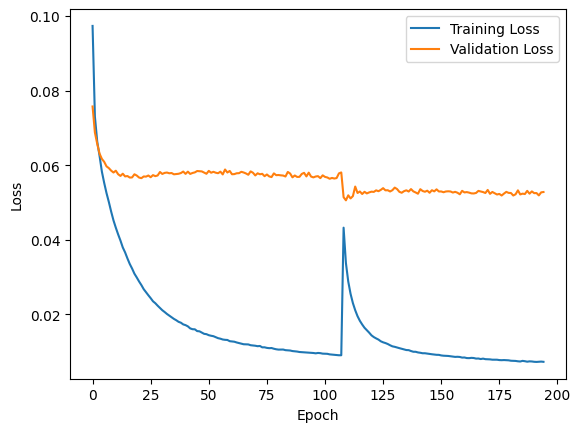

In [3]:
import matplotlib.pyplot as plt

plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [4]:
# epoch = 250
# print(train_loss_history[epoch - 1].item(), val_loss_history[epoch - 1].item())

Find epoch index with minimum validation loss value

In [21]:
import numpy as np

start = 197
epoch = np.argmin(np.array(val_loss_history[start:])) + 1 + start
epoch.item(), train_loss_history[epoch - 1].item(), val_loss_history[epoch - 1].item()

(199, 0.04334477126057255, 0.1412285380065441)

In [18]:
import pandas as pd

csv_file = "/home/dgm_bait_02/text_detection/yolo/runs/segment/train5/results.csv"

df = pd.read_csv(csv_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 114 non-null    int64  
 1   time                  114 non-null    float64
 2   train/box_loss        114 non-null    float64
 3   train/seg_loss        114 non-null    float64
 4   train/cls_loss        114 non-null    float64
 5   train/dfl_loss        114 non-null    float64
 6   metrics/precision(B)  114 non-null    float64
 7   metrics/recall(B)     114 non-null    float64
 8   metrics/mAP50(B)      114 non-null    float64
 9   metrics/mAP50-95(B)   114 non-null    float64
 10  metrics/precision(M)  114 non-null    float64
 11  metrics/recall(M)     114 non-null    float64
 12  metrics/mAP50(M)      114 non-null    float64
 13  metrics/mAP50-95(M)   114 non-null    float64
 14  val/box_loss          114 non-null    float64
 15  val/seg_loss          1

In [19]:
df.head()

,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,831.473,0.95384,1.54549,0.76960,1.06067,0.80978,0.78446,0.85241,0.52000,...,0.75022,0.80134,0.43379,1.30324,2.15648,0.74589,1.25676,0.003332,0.003332,0.003332
1,2,1643.210,0.93269,1.45737,0.67081,1.03934,0.81308,0.78867,0.85244,0.50530,...,0.75410,0.79939,0.41195,1.35681,2.26412,0.75054,1.37599,0.006663,0.006663,0.006663
2,3,2451.840,0.98309,1.52090,0.72345,1.07213,0.80225,0.76934,0.83442,0.50189,...,0.73549,0.79141,0.42253,1.35424,2.24710,0.79510,1.36653,0.009992,0.009992,0.009992
3,4,3261.640,0.98796,1.52285,0.72467,1.08254,0.81933,0.78312,0.85544,0.50966,...,0.74567,0.80134,0.41718,1.33951,2.18053,0.75171,1.36126,0.009990,0.009990,0.009990
4,5,4071.170,0.95879,1.47848,0.68381,1.06535,0.82844,0.79609,0.86599,0.52248,...,0.75436,0.81104,0.42357,1.30747,2.16394,0.72226,1.35622,0.009987,0.009987,0.009987


<Axes: >

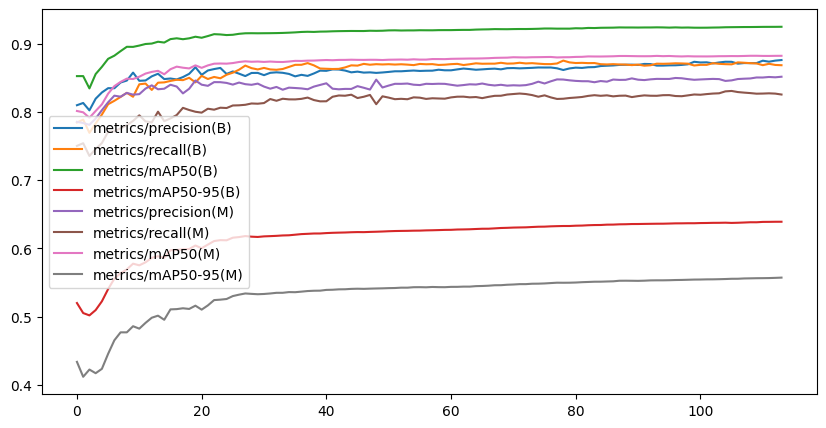

In [20]:
df[[column for column in df.columns if "metrics" in column]].plot(kind="line", figsize=(10, 5))